# Training Tutorial

This notebook goes through parts 1-3 in the preprocessing, training, and evaluation of the images. For each part, there is a detailed notebook in their respective directories. 

In [1]:
import sys
sys.path.insert(0,'1_preprocessing')
sys.path.insert(0,'2_trainer')
sys.path.insert(0,'3_evaluate')
from make_data import *
from input_data import *
from models import *
from training_utilities import *
from stitcher import make_prediction
from os import makedirs

Using TensorFlow backend.


## Part 1: Preprocessing

In [2]:
input_dir = "../data/WSeTe/simulated/"
data_dirs = [str(i) for i in range(2)]
label_list = ["Se"]
parsed_dir_name='parsed_label_Se'
ftype = '.tiff'

In [3]:
l_shape = (256,256)
stride = (128,128)
one_pickle=True
tr_bs = 2000
ts_bs = 200
ones_percent = .00
tol = 0.05
show_plots=False

In [4]:
create_augments(input_dir, data_dirs, ftype)

creating augments in 0
inverting
rotating
magnifying
creating augments in 1
inverting
rotating
magnifying


In [5]:
make_data(input_dir, label_list, data_dirs, l_shape, stride, ftype,\
        parsed_dir_name=parsed_dir_name, tr_bs=tr_bs, ts_bs=ts_bs, ones_percent=ones_percent, \
        tol=tol, show_plots=show_plots, one_save=one_pickle)

0
mag1_rot0_orig
mag2_rot1_orig
mag2_rot0_flip
mag0_rot0_orig
mag2_rot2_orig
mag2_rot3_flip
mag2_rot0_orig
mag0_rot3_flip
mag2_rot2_flip
mag0_rot1_orig
mag2_rot3_orig
mag0_rot1_flip
mag2_rot1_flip
mag1_rot2_flip
mag0_rot3_orig
mag1_rot1_flip
mag0_rot2_orig
mag1_rot1_orig
mag1_rot3_orig
mag0_rot2_flip
mag0_rot0_flip
mag1_rot3_flip
mag1_rot0_flip
mag1_rot2_orig
1176 total examples
1
mag1_rot0_orig
mag2_rot1_orig
mag2_rot0_flip
mag0_rot0_orig
mag2_rot2_orig
mag2_rot3_flip
mag2_rot0_orig
mag0_rot3_flip
mag2_rot2_flip
mag0_rot1_orig
mag2_rot3_orig
mag0_rot1_flip
mag2_rot1_flip
mag1_rot2_flip
mag0_rot3_orig
mag1_rot1_flip
mag0_rot2_orig
mag1_rot1_orig
mag1_rot3_orig
mag0_rot2_flip
mag0_rot0_flip
mag1_rot3_flip
mag1_rot0_flip
mag1_rot2_orig
1176 total examples


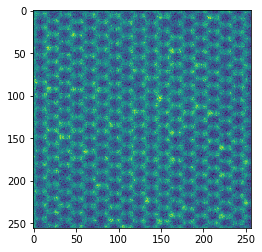

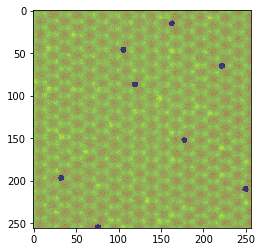

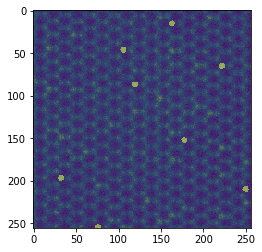

In [6]:
parsed_fn = input_dir + parsed_dir_name + "/train/train_0.p"
check_data(parsed_fn, l_shape=l_shape) 

## Part 2: Training

In [10]:
parent_dir = '../'
data_dir   = parent_dir + 'data/WSeTe/simulated/parsed_label_Se/'
sess_name  = 'Se'
N          = 256
k_fac      = 16
nb_classes = 2

In [11]:
sess_dir = parent_dir + "results/" + sess_name + "/"
makedirs(sess_dir, exist_ok=True)

model_weights_fn = sess_dir + "weights.h5"
model_fn         = sess_dir + "model.json"
diagnostics_fn   = sess_dir + "diagnostics.dat"

In [12]:
model = construct_model(N, k_fac, nb_classes, sess_dir, model_fn, model_weights_fn)
step = setup_diagnostics(diagnostics_fn)

W0212 15:10:02.706732 139626268035968 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0212 15:10:02.718177 139626268035968 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 15:10:02.721630 139626268035968 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0212 15:10:02.739867 139626268035968 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W021

creating new session


In [13]:
train(step, data_dir, N, nb_classes, model, diagnostics_fn, model_weights_fn)

training step: 0	training file: train_1.p
	grabbing data


W0212 15:10:20.403628 139626268035968 deprecation.py:323] From /home/abid/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


	done
Train on 1058 samples, validate on 118 samples
Epoch 1/1
1058/1058 [==============================] - 650s 614ms/step - loss: 0.2730 - acc: 0.9638 - val_loss: 0.1922 - val_acc: 0.9448
	calculating accuracy
0.051324747376522775
	done
TP = -1, FP = -1, FN = -1, TN = -1
recall = -1, precision = -1, F1 = -1, bal_acc = -1
training step: 1	training file: train_1.p
	grabbing data
	done
Train on 1058 samples, validate on 118 samples
Epoch 1/1


KeyboardInterrupt: 

## Part 3: Evaluation 

In [5]:
parent_dir  = "/home/abid/Dropbox/Development/programs/stem-learning/"                            
results_dir = parent_dir + "results/Se/"
data_dir = parent_dir + "data/WSeTe/simulated/3/"


model_fn = results_dir + "model.json"                                              
model_weights_fn = results_dir + "weights.h5"
input_file =  data_dir + "input.tiff"
Tol = 0.05                          
avg = 1 
# see part 1 for l_shape and stride
label_file_list = [data_dir + "label_Se.tiff"]
thresh = -1
plot=True
save_data=True
save_dir = "./"                                                         
prefix = "Se_"

W0212 15:48:38.580259 140170833116032 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 15:48:38.597290 140170833116032 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0212 15:48:38.613166 140170833116032 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0212 15:48:38.613677 140170833116032 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W02

processing data
/home/abid/Dropbox/Development/programs/stem-learning/data/WSeTe/simulated/3/input.tiff
loading model


W0212 15:48:38.766389 140170833116032 deprecation_wrapper.py:119] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0212 15:48:38.894850 140170833116032 deprecation.py:506] From /home/abid/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


cutting data
predicting data
stitching data


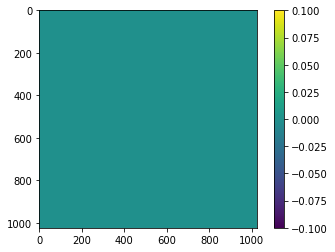

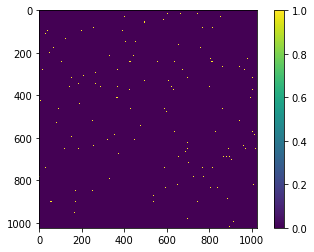

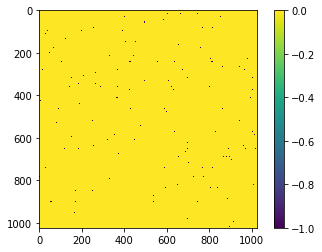

In [6]:
make_prediction(model_fn, model_weights_fn, input_file, Tol, avg, l_shape,\
                    stride, label_file_list=label_file_list, thresh=thresh, plot=plot, \
                    save_data=save_data, save_dir=save_dir, prefix=prefix)